## Matrix Profiler - NYC Taxi Dataset (NAB)
Prima di utilizzare questo script, bisogna caricare il file csv dei dati [nyc_taxi.csv](https://drive.google.com/file/d/1I7Q0BttBM9sgZ3Ekm6cq6u2fCgcp45ef/view?usp=sharing).
Siccome l'algoritmo di Matrix Profiler non è presente su Colab, bisogna installarlo (forse richiede un riavvio del runtime).

### Anomalie
Le anomalie in questo dataset sono capitate i giorni:
* Maratona di New York - 02/11/2014
* Thanksgiving - 27/11/2014
* Natale
* Capodanno
* Tempesta di neve (13 - 26 Novembre 2014)

In [1]:
# Installazione librerie MP
!pip install matrixprofile

In [2]:
# Import delle librerie necessarie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matrixprofile as mp
import datetime as dt

In [3]:
# Costanti
DATASET_PATH = 'nyc_taxi.csv'
#DAILY_WINDOW = 24
DAILY_WINDOW = 48 # Dati analizzati giornalmente. Campioni presi ogni mezz'ora
#DAILY_WINDOW = 48 * 7

In [16]:
# Caricamento dataset
#taxi = pd.read_csv(DATASET_PATH, index_col=0)
taxi = pd.read_csv(DATASET_PATH)
taxi.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [17]:
# Recupero array di valori dei dati
dataset = np.array(taxi['value'])
dataset

array([10844,  8127,  6210, ..., 27309, 26591, 26288])

## Analisi dei dati con MP

In [41]:
# Creazione Matrix Profile
daily_profile = mp.compute(dataset, windows=DAILY_WINDOW)
daily_profile

{'algorithm': 'mpx',
 'class': 'MatrixProfile',
 'data': {'query': None,
  'ts': array([10844.,  8127.,  6210., ..., 27309., 26591., 26288.])},
 'ez': 0,
 'join': False,
 'lmp': None,
 'lpi': None,
 'metric': 'euclidean',
 'mp': array([0.77870087, 0.77881232, 0.78245679, ..., 0.75218551, 0.74705577,
        0.73072576]),
 'pi': array([2352,  337,  338, ..., 9598, 9599, 9600]),
 'rmp': None,
 'rpi': None,
 'sample_pct': 1,
 'w': 48}

In [42]:
# Ricerca delle prime 5 anomalie nei dati - Zona di esclusione di 7 giorni tra le anomalie
daily_profile = mp.discover.discords(daily_profile, k=8, exclusion_zone=DAILY_WINDOW)
daily_profile['discords']

array([10098,  5953, 10025,  8795,   110,  8449,  9666,   158])

/usr/local/lib/python3.7/dist-packages/matrixprofile/visualize.py:375: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


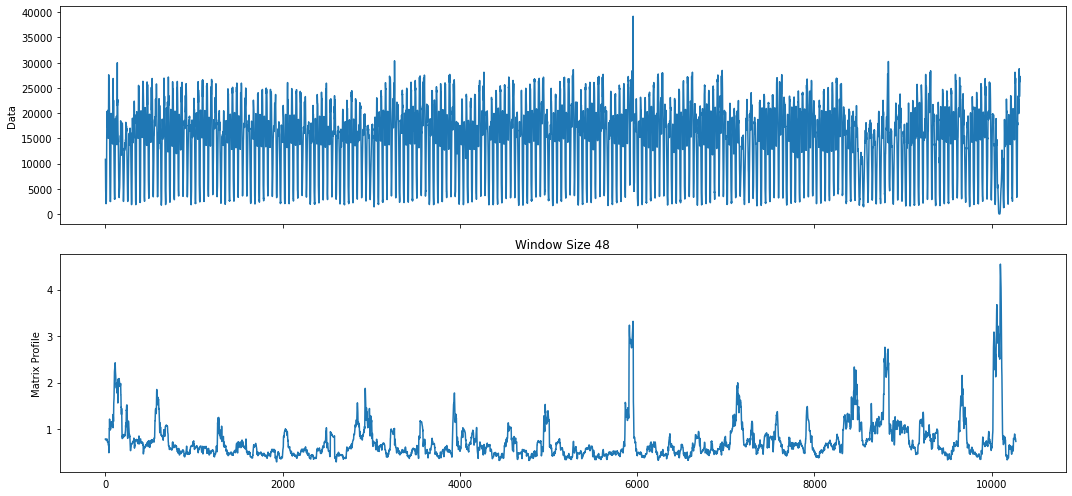

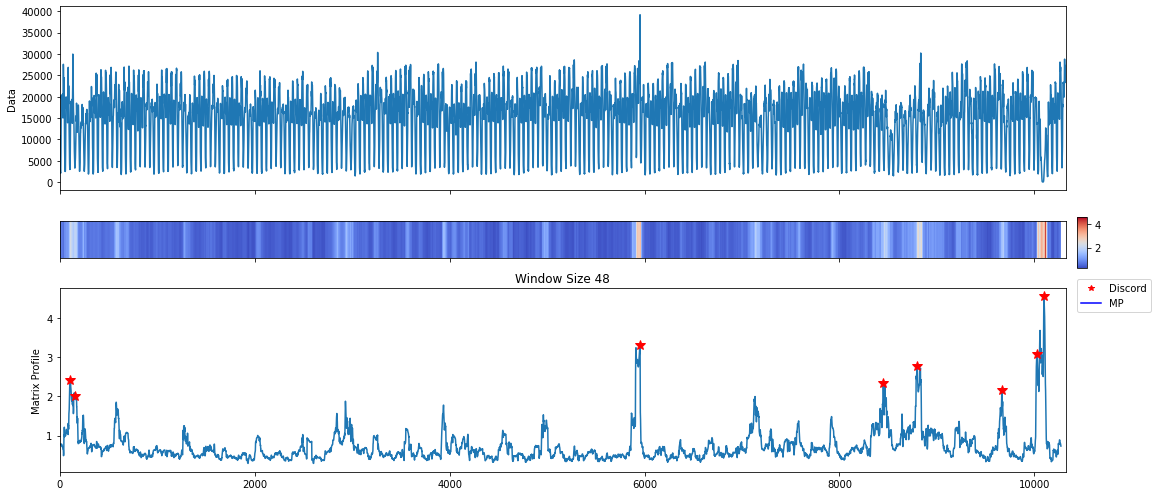

In [43]:
# Plot dei grafici del MP
figures = mp.visualize(daily_profile)

In [44]:
# Recupero valori delle date delle anomalie
taxi['timestamp'][daily_profile['discords']]

10098    2015-01-27 09:00:00
5953     2014-11-02 00:30:00
10025    2015-01-25 20:30:00
8795     2014-12-31 05:30:00
110      2014-07-03 07:00:00
8449     2014-12-24 00:30:00
9666     2015-01-18 09:00:00
158      2014-07-04 07:00:00
Name: timestamp, dtype: object

In [45]:
discords_timestamps = []
for i in daily_profile['discords']:
  discords_timestamps.append(taxi.at[i, 'timestamp'])

discords_timestamps = pd.to_datetime(discords_timestamps)
discords_timestamps

DatetimeIndex(['2015-01-27 09:00:00', '2014-11-02 00:30:00',
               '2015-01-25 20:30:00', '2014-12-31 05:30:00',
               '2014-07-03 07:00:00', '2014-12-24 00:30:00',
               '2015-01-18 09:00:00', '2014-07-04 07:00:00'],
              dtype='datetime64[ns]', freq=None)

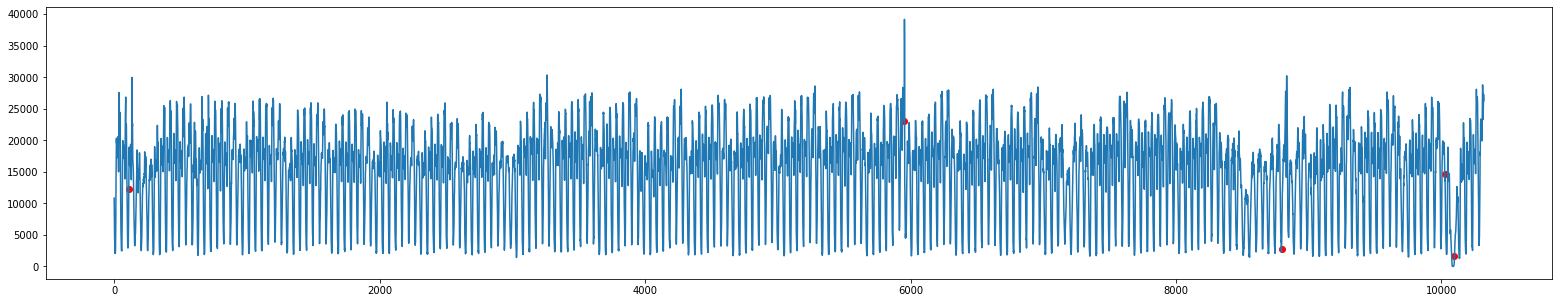

In [22]:
# Plot anomalie sul dataset originale
plt.figure(figsize=(27,5))
plt.plot(np.arange(len(taxi['value'])), taxi['value'])
plt.scatter(daily_profile['discords'], taxi['value'][daily_profile['discords']], color='red')
plt.show()

In [ ]:
figures[1].savefig('MP_NYC_7D.png')

In [32]:
taxi2 = pd.read_csv(DATASET_PATH, index_col=0)
taxi2.index = pd.to_datetime(taxi2.index)
taxi2.head()

,value
timestamp,
2014-07-01 00:00:00,10844
2014-07-01 00:30:00,8127
2014-07-01 01:00:00,6210
2014-07-01 01:30:00,4656
2014-07-01 02:00:00,3820


In [46]:
taxi2['value'][discords_timestamps]

2015-01-27 09:00:00     1589
2014-11-02 00:30:00    23109
2015-01-25 20:30:00    14598
2014-12-31 05:30:00     2825
2014-07-03 07:00:00    12240
2014-12-24 00:30:00     9158
2015-01-18 09:00:00     9919
2014-07-04 07:00:00     4828
Name: value, dtype: int64

In [39]:
# Creazione eventi anomali
events = {
'independence_day' : ('2014-07-04 00:00:00',
                      '2014-07-07 00:00:00'),
'labor_day'        : ('2014-09-01 00:00:00',
                      '2014-09-02 00:00:00'),
'labor_day_parade' : ('2014-09-06 00:00:00',
                      '2014-09-07 00:00:00'),
'nyc_marathon'     : ('2014-11-02 00:00:00',
                      '2014-11-03 00:00:00'),
'thanksgiving'     : ('2014-11-27 00:00:00',
                      '2014-11-28 00:00:00'),
'christmas'        : ('2014-12-25 00:00:00',
                      '2014-12-26 00:00:00'),
'new_year'         : ('2015-01-01 00:00:00',
                      '2015-01-02 00:00:00'),
'blizzard'         : ('2015-01-26 00:00:00',
                      '2015-01-28 00:00:00')
}
taxi2['event'] = np.zeros(len(taxi2))
for event, duration in events.items():
    start, end = duration
    taxi2.loc[start:end, 'event'] = 1

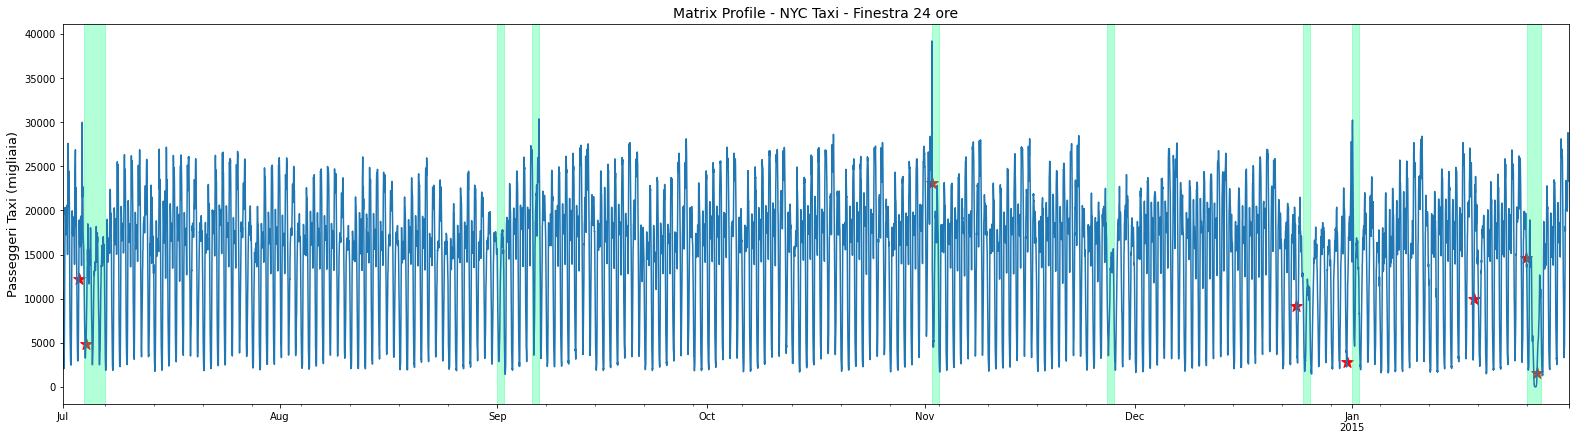

In [58]:
# Plot dei risultati

fig, ax = plt.subplots(1, figsize=(27, 7))
(taxi2['value']).plot(ax=ax)
#(taxi2['value'][discords_timestamps]).plot(ax=ax)

for event, duration in events.items():
    start, end = duration
    ax.axvspan(start, end, alpha=0.3,
                  color='springgreen')
    
ax.scatter(discords_timestamps, taxi2['value'][discords_timestamps], color='r', marker='*', s=150)

ax.set_xlabel('')
ax.set_xlabel('')

ax.set_ylabel('Passeggeri Taxi (migliaia)', size=13)
ax.set_title('Matrix Profile - NYC Taxi - Finestra 24 ore',size=14)

fig.savefig('MP_NYC_24H.png')
plt.show()